In [3]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Lambda, merge, Dense, Flatten
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model, Sequential, model_from_json, load_model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
from keras import backend as K
from keras.optimizers import Adam

%run data_loader.ipynb
%run encoder.ipynb

In [4]:
train_prepared_data = prepare_data(X)
train_prepared_data = np.array(train_prepared_data)
input_x  = train_prepared_data/np.mean(train_prepared_data)

In [7]:
class_names = ['Genuine','Forged']

In [8]:
clf = Sequential()
clf.add(Dense(128, kernel_initializer='uniform', activation='relu'))
clf.add(Dense(64, kernel_initializer='uniform', activation='relu'))
clf.add(Dense(32, kernel_initializer='uniform', activation='relu'))
clf.add(Dense(8, kernel_initializer='uniform', activation='relu'))
clf.add(Dense(2, kernel_initializer='uniform', activation='softmax'))

In [9]:
clf.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

In [10]:
#clf.fit(input_x, T, epochs=500, batch_size=50)
history = clf.fit(input_x, T, validation_split=0.2, epochs=500,  batch_size=50)

Instructions for updating:
Use tf.cast instead.
Train on 18564 samples, validate on 4641 samples
Epoch 1/500
18564/18564 [==============================] - 3s 181us/step - loss: 0.4856 - acc: 0.7560 - val_loss: 0.4188 - val_acc: 0.8005
Epoch 2/500
18564/18564 [==============================] - 2s 108us/step - loss: 0.4155 - acc: 0.8031 - val_loss: 0.4237 - val_acc: 0.8044
Epoch 3/500
18564/18564 [==============================] - 2s 108us/step - loss: 0.4005 - acc: 0.8147 - val_loss: 0.4010 - val_acc: 0.8138
Epoch 4/500
18564/18564 [==============================] - 2s 108us/step - loss: 0.3868 - acc: 0.8181 - val_loss: 0.3941 - val_acc: 0.8164
Epoch 5/500
18564/18564 [==============================] - 2s 109us/step - loss: 0.3732 - acc: 0.8278 - val_loss: 0.3869 - val_acc: 0.8218
Epoch 6/500
18564/18564 [==============================] - 2s 108us/step - loss: 0.3586 - acc: 0.8355 - val_loss: 0.3720 - val_acc: 0.8250
Epoch 7/500
18564/18564 [==============================] - 2s 107us/s

18564/18564 [==============================] - 2s 102us/step - loss: 0.0300 - acc: 0.9900 - val_loss: 0.6285 - val_acc: 0.8970
Epoch 58/500
18564/18564 [==============================] - 2s 103us/step - loss: 0.0225 - acc: 0.9924 - val_loss: 0.7055 - val_acc: 0.8964
Epoch 59/500
18564/18564 [==============================] - 3s 141us/step - loss: 0.0228 - acc: 0.9915 - val_loss: 0.6992 - val_acc: 0.8901
Epoch 60/500
18564/18564 [==============================] - 2s 103us/step - loss: 0.0312 - acc: 0.9887 - val_loss: 0.5163 - val_acc: 0.8854
Epoch 61/500
18564/18564 [==============================] - 2s 103us/step - loss: 0.0250 - acc: 0.9919 - val_loss: 0.6208 - val_acc: 0.8946
Epoch 62/500
18564/18564 [==============================] - 2s 103us/step - loss: 0.0265 - acc: 0.9908 - val_loss: 0.6276 - val_acc: 0.8959
Epoch 63/500
18564/18564 [==============================] - 2s 114us/step - loss: 0.0189 - acc: 0.9939 - val_loss: 0.6085 - val_acc: 0.8923
Epoch 64/500
18564/18564 [=======

18564/18564 [==============================] - 2s 118us/step - loss: 0.0152 - acc: 0.9953 - val_loss: 0.7065 - val_acc: 0.8910
Epoch 116/500
18564/18564 [==============================] - 2s 116us/step - loss: 0.0180 - acc: 0.9942 - val_loss: 0.4984 - val_acc: 0.8877
Epoch 117/500
18564/18564 [==============================] - 2s 124us/step - loss: 0.0079 - acc: 0.9976 - val_loss: 0.7133 - val_acc: 0.8972
Epoch 118/500
18564/18564 [==============================] - 3s 136us/step - loss: 0.0166 - acc: 0.9950 - val_loss: 0.6581 - val_acc: 0.9033
Epoch 119/500
18564/18564 [==============================] - 2s 115us/step - loss: 0.0097 - acc: 0.9969 - val_loss: 0.6721 - val_acc: 0.8968
Epoch 120/500
18564/18564 [==============================] - 2s 117us/step - loss: 0.0130 - acc: 0.9954 - val_loss: 0.5331 - val_acc: 0.8796
Epoch 121/500
18564/18564 [==============================] - 2s 130us/step - loss: 0.0101 - acc: 0.9967 - val_loss: 0.7656 - val_acc: 0.8998
Epoch 122/500
18564/18564 [

18564/18564 [==============================] - 2s 112us/step - loss: 1.1954e-07 - acc: 1.0000 - val_loss: 1.1863 - val_acc: 0.9026
Epoch 172/500
18564/18564 [==============================] - 2s 112us/step - loss: 1.1947e-07 - acc: 1.0000 - val_loss: 1.1887 - val_acc: 0.9026
Epoch 173/500
18564/18564 [==============================] - 2s 113us/step - loss: 1.1939e-07 - acc: 1.0000 - val_loss: 1.1903 - val_acc: 0.9026
Epoch 174/500
18564/18564 [==============================] - 2s 112us/step - loss: 1.1934e-07 - acc: 1.0000 - val_loss: 1.1923 - val_acc: 0.9026
Epoch 175/500
18564/18564 [==============================] - 2s 111us/step - loss: 1.1931e-07 - acc: 1.0000 - val_loss: 1.1936 - val_acc: 0.9028
Epoch 176/500
18564/18564 [==============================] - 2s 113us/step - loss: 1.1929e-07 - acc: 1.0000 - val_loss: 1.1949 - val_acc: 0.9028
Epoch 177/500
18564/18564 [==============================] - 2s 112us/step - loss: 1.1926e-07 - acc: 1.0000 - val_loss: 1.1960 - val_acc: 0.9028

18564/18564 [==============================] - 2s 106us/step - loss: 8.0909e-07 - acc: 1.0000 - val_loss: 0.9933 - val_acc: 0.9091
Epoch 229/500
18564/18564 [==============================] - 2s 105us/step - loss: 6.6998e-07 - acc: 1.0000 - val_loss: 1.0004 - val_acc: 0.9093
Epoch 230/500
18564/18564 [==============================] - 2s 112us/step - loss: 5.5706e-07 - acc: 1.0000 - val_loss: 1.0079 - val_acc: 0.9091
Epoch 231/500
18564/18564 [==============================] - 2s 108us/step - loss: 4.6642e-07 - acc: 1.0000 - val_loss: 1.0147 - val_acc: 0.9091
Epoch 232/500
18564/18564 [==============================] - 2s 116us/step - loss: 3.9617e-07 - acc: 1.0000 - val_loss: 1.0213 - val_acc: 0.9091
Epoch 233/500
18564/18564 [==============================] - 2s 113us/step - loss: 3.4006e-07 - acc: 1.0000 - val_loss: 1.0277 - val_acc: 0.9093
Epoch 234/500
18564/18564 [==============================] - 2s 111us/step - loss: 2.9457e-07 - acc: 1.0000 - val_loss: 1.0341 - val_acc: 0.9091

18564/18564 [==============================] - 2s 112us/step - loss: 0.0036 - acc: 0.9990 - val_loss: 0.7366 - val_acc: 0.8981
Epoch 285/500
18564/18564 [==============================] - 2s 111us/step - loss: 0.0074 - acc: 0.9975 - val_loss: 0.8015 - val_acc: 0.9007
Epoch 286/500
18564/18564 [==============================] - 2s 112us/step - loss: 0.0164 - acc: 0.9947 - val_loss: 0.7079 - val_acc: 0.9007
Epoch 287/500
18564/18564 [==============================] - 2s 114us/step - loss: 0.0078 - acc: 0.9977 - val_loss: 0.7151 - val_acc: 0.9050
Epoch 288/500
18564/18564 [==============================] - 2s 111us/step - loss: 0.0205 - acc: 0.9929 - val_loss: 0.5773 - val_acc: 0.9011
Epoch 289/500
18564/18564 [==============================] - 2s 112us/step - loss: 0.0029 - acc: 0.9993 - val_loss: 0.7061 - val_acc: 0.9026
Epoch 290/500
18564/18564 [==============================] - 2s 112us/step - loss: 2.4625e-04 - acc: 1.0000 - val_loss: 0.7864 - val_acc: 0.9045
Epoch 291/500
18564/185

Epoch 341/500
18564/18564 [==============================] - 2s 111us/step - loss: 1.1934e-07 - acc: 1.0000 - val_loss: 1.1920 - val_acc: 0.9058
Epoch 342/500
18564/18564 [==============================] - 2s 112us/step - loss: 1.1931e-07 - acc: 1.0000 - val_loss: 1.1934 - val_acc: 0.9058
Epoch 343/500
18564/18564 [==============================] - 2s 114us/step - loss: 1.1928e-07 - acc: 1.0000 - val_loss: 1.1952 - val_acc: 0.9058
Epoch 344/500
18564/18564 [==============================] - 2s 114us/step - loss: 1.1925e-07 - acc: 1.0000 - val_loss: 1.1959 - val_acc: 0.9063
Epoch 345/500
18564/18564 [==============================] - 2s 113us/step - loss: 1.1924e-07 - acc: 1.0000 - val_loss: 1.1961 - val_acc: 0.9058
Epoch 346/500
18564/18564 [==============================] - 2s 111us/step - loss: 1.1923e-07 - acc: 1.0000 - val_loss: 1.1961 - val_acc: 0.9054
Epoch 347/500
18564/18564 [==============================] - 2s 113us/step - loss: 1.1923e-07 - acc: 1.0000 - val_loss: 1.1973 - v

Epoch 398/500
18564/18564 [==============================] - 2s 114us/step - loss: 2.0545e-07 - acc: 1.0000 - val_loss: 1.1021 - val_acc: 0.9035
Epoch 399/500
18564/18564 [==============================] - 2s 112us/step - loss: 1.8821e-07 - acc: 1.0000 - val_loss: 1.1077 - val_acc: 0.9033
Epoch 400/500
18564/18564 [==============================] - 2s 113us/step - loss: 1.7501e-07 - acc: 1.0000 - val_loss: 1.1136 - val_acc: 0.9033
Epoch 401/500
18564/18564 [==============================] - 2s 111us/step - loss: 1.6426e-07 - acc: 1.0000 - val_loss: 1.1189 - val_acc: 0.9030
Epoch 402/500
18564/18564 [==============================] - 2s 112us/step - loss: 1.5548e-07 - acc: 1.0000 - val_loss: 1.1241 - val_acc: 0.9030
Epoch 403/500
18564/18564 [==============================] - 2s 113us/step - loss: 1.4829e-07 - acc: 1.0000 - val_loss: 1.1293 - val_acc: 0.9030
Epoch 404/500
18564/18564 [==============================] - 2s 113us/step - loss: 1.4276e-07 - acc: 1.0000 - val_loss: 1.1339 - v

Epoch 455/500
18564/18564 [==============================] - 2s 110us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.2204 - val_acc: 0.9028
Epoch 456/500
18564/18564 [==============================] - 2s 109us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.2204 - val_acc: 0.9028
Epoch 457/500
18564/18564 [==============================] - 1s 73us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.2204 - val_acc: 0.9028
Epoch 458/500
18564/18564 [==============================] - 1s 72us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.2204 - val_acc: 0.9028
Epoch 459/500
18564/18564 [==============================] - 1s 73us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.2204 - val_acc: 0.9028
Epoch 460/500
18564/18564 [==============================] - 1s 74us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.2204 - val_acc: 0.9028
Epoch 461/500
18564/18564 [==============================] - 1s 74us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.2204 - val_ac

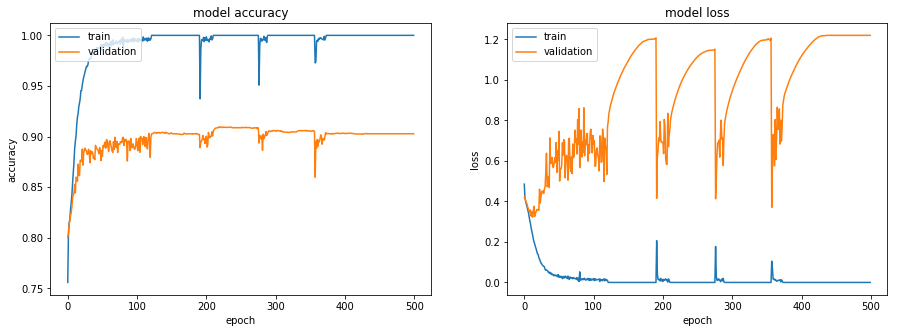

In [13]:
# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.show()
# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [11]:
# serialize model to JSON
model_json = clf.to_json()
with open("checkpoint/model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
clf.save_weights("checkpoint/model.h5")
print("Saved model to disk")

Saved model to disk


In [12]:
clf.save('checkpoint/trained_model.h5')  # creates a HDF5 file 'my_model.h5'
print("Saved model to disk")

# returns a compiled model
# identical to the previous one


Saved model to disk
